In [2]:
import pandas
import seaborn

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


### Analysis of education data of Polish legislative branch politicians

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
dfe = pandas.read_excel('../output/Poslowie_Edukacja_stara_kadencja.xlsx')

In [5]:
dfe.head()

,name,date_of_birth,birth_place,party_list,institution,department,major,year
0,Michał Jach,1951-09-23,Łomża,Prawo i Sprawiedliwość,Wojskowa Akademia Techniczna,Wydział Elektroniki,Radiolokacja (1973),1973
1,Michał Jach,1951-09-23,Łomża,Prawo i Sprawiedliwość,Uniwersytet Szczeciński,Wydział Ekonomii,Ekonomika i Organizacja Transportu - magister ...,1994
2,Michał Jach,1951-09-23,Łomża,Prawo i Sprawiedliwość,Warszawska Szkoła Zarządzania - Szkoła Wyższa,NaN,Zarządzanie Przedsiębiorstwem (1997) - studia ...,1997
3,Michał Jach,1951-09-23,Łomża,Prawo i Sprawiedliwość,Uniwersytet Szczeciński,NaN,Master of Business Administration (2000) - stu...,2000
4,Piotr Szeliga,1977-10-12,Biłgoraj,Prawo i Sprawiedliwość,Uniwersytet w Trewirze,Wydział Teologiczny,Teologia - magister (2006),2006


In [6]:
dfe.describe()

,year
count,827.000000
mean,1993.784764
std,11.890526
min,1963.000000
25%,1984.000000
50%,1996.000000
75%,2003.000000
max,2015.000000


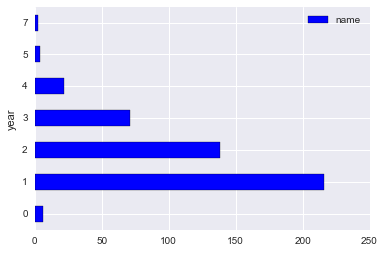

In [7]:
# Y - ile kierunków skończył poseł
# X - ilu posłów wpada do tej kategorii
dfe.groupby('name')['year'].count().reset_index().groupby('year').count().plot(kind='barh')

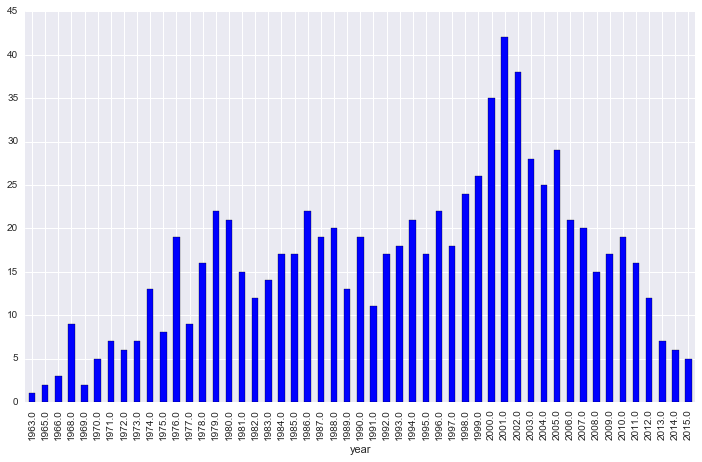

In [9]:
dfe.groupby('year').count()['major'].plot(kind='bar', figsize=(12,7))

In [8]:
dfe['yob'] = dfe['date_of_birth'].apply(lambda x: x.year)

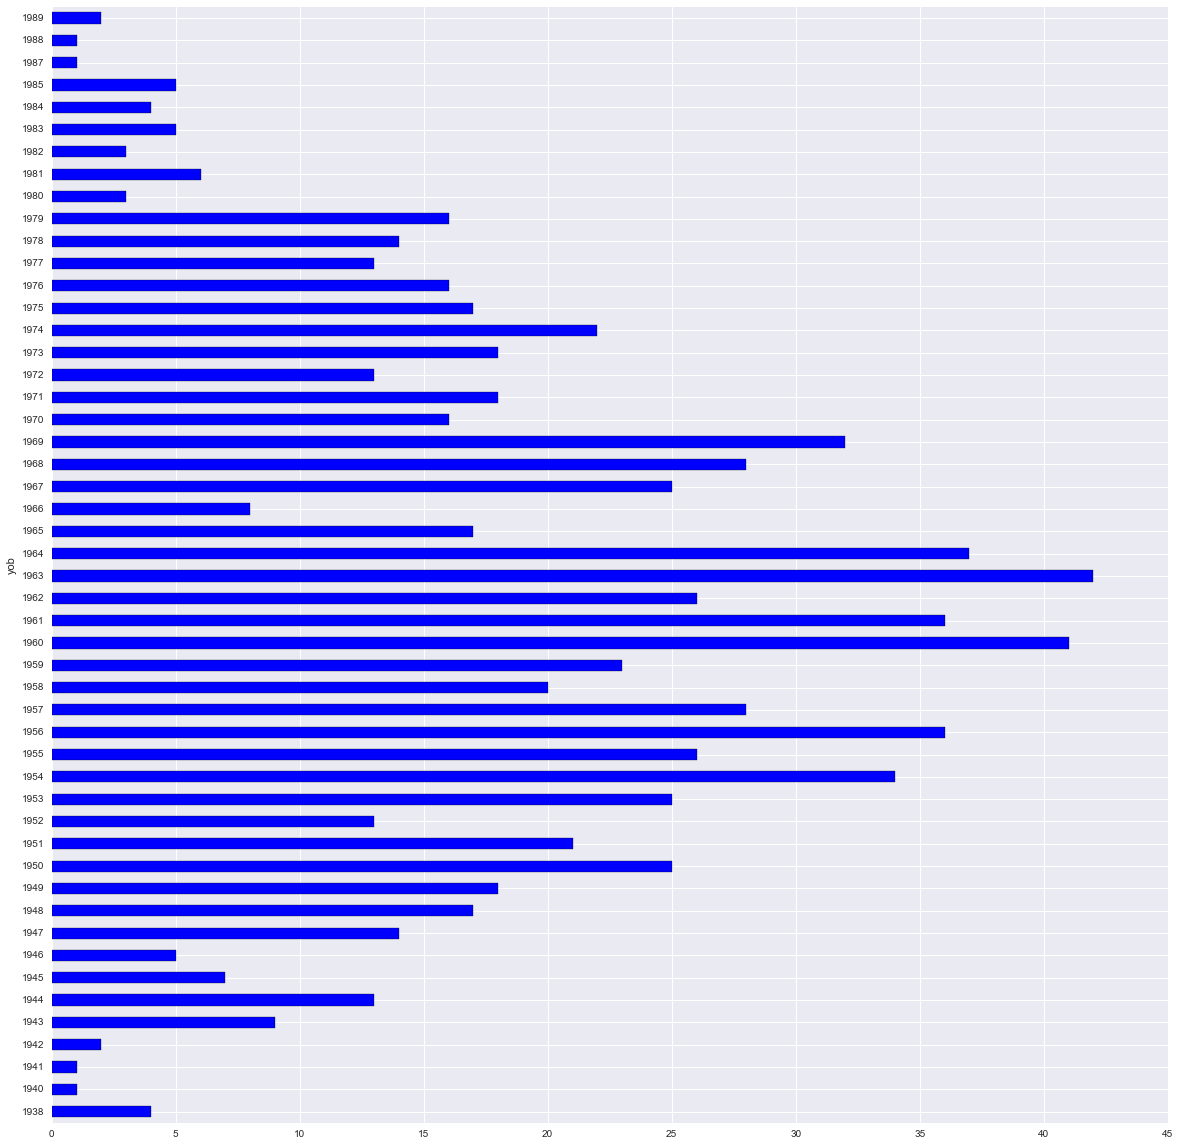

In [9]:
dfe.groupby('yob').count()['year'].plot(kind='barh', figsize=(20,20))

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


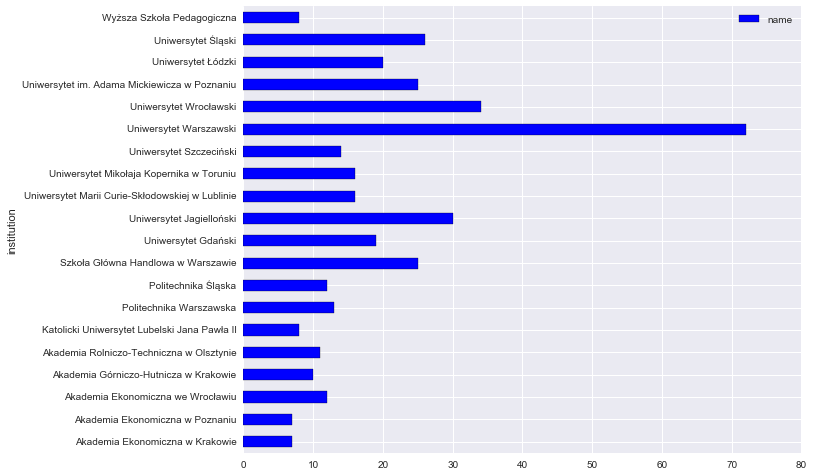

In [12]:
grpd=dfe.groupby('institution').count()['name'].reset_index().sort('name', ascending=False).iloc[:20]
grpd.groupby('institution').sum().plot(kind='barh', figsize=(10, 8))

In [13]:
top_uni = dfe[dfe.institution.isin(grpd.institution.unique().tolist()[:-1])]

In [14]:
len(top_uni)

378

In [15]:
party_university_counts = []
for party in top_uni.party_list.unique().tolist():
    party_university_counts.append(top_uni[top_uni['party_list'] == party]['institution'].value_counts())

In [14]:
party_uni = pandas.concat(party_university_counts, keys=top_uni.party_list.unique().tolist()[:-1], axis=1)
party_uni.fillna(0)

,Prawo i Sprawiedliwość,Platforma Obywatelska,Ruch Palikota,Polskie Stronnictwo Ludowe,Sojusz Lewicy Demokratycznej
Akademia Ekonomiczna w Poznaniu,0,5,2,0,0
Akademia Ekonomiczna we Wrocławiu,1,7,2,0,1
Akademia Górniczo-Hutnicza w Krakowie,6,4,0,0,0
Akademia Rolniczo-Techniczna w Olsztynie,3,5,0,3,0
Katolicki Uniwersytet Lubelski Jana Pawła II,8,0,0,0,0
Politechnika Warszawska,3,7,0,1,2
Politechnika Śląska,1,9,1,0,1
Szkoła Główna Handlowa w Warszawie,5,15,1,1,3
Uniwersytet Gdański,5,13,0,1,0
Uniwersytet Jagielloński,16,14,0,0,0


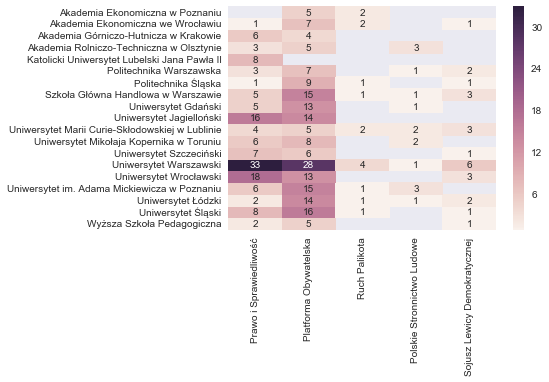

In [15]:
seaborn.heatmap(party_uni, annot=True)

In [59]:
dfe['yob_group'] = pandas.cut(dfe.yob, [dfe.yob.min(), 1950, 1960, 1970, 1980, dfe.yob.max()])

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


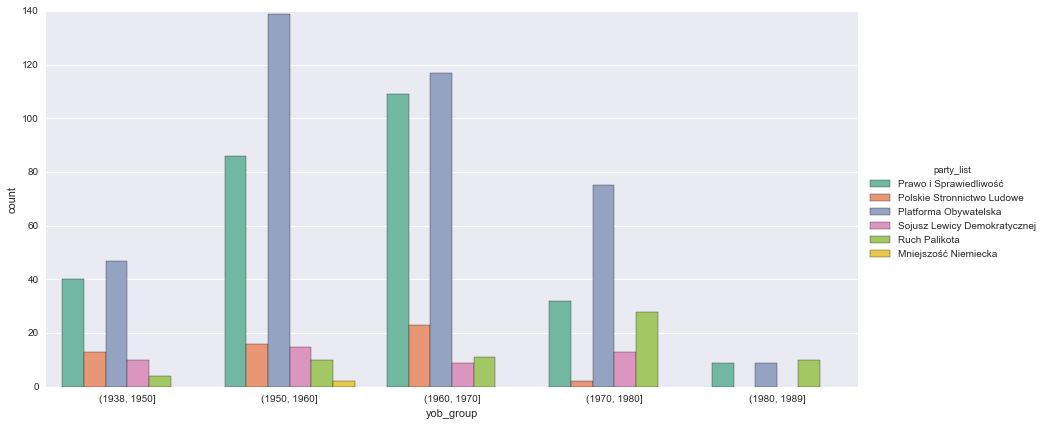

In [60]:
seaborn.factorplot('yob_group', kind='count', hue='party_list', data=dfe, size=6, aspect=2, palette="Set2")